In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import csv
import numpy as np

from virtual_screening.function import *

In [2]:
file_list = ['../../dataset/keck_pcba/fold_5/file_{}.csv'.format(i) for i in range(5)]
data_pd_list = []
for i in range(5):
    temp_file_list = file_list[i:i + 1]
    temp = read_merged_data(temp_file_list)
    data_pd_list.append(temp)

In [3]:
# Last 128 is PCBA labels
target_names = data_pd_list[0].columns[-128:].tolist()

# Add Keck Pria as last label, Keck_Pria_FP_data, Keck_RMI_cdd
target_names.extend(['Keck_Pria_AS_Retest', 'Keck_Pria_FP_data', 'Keck_RMI_cdd'])

print 'target names size is {}'.format(len(target_names))
print target_names

target names size is 131
['pcba-aid1030', 'pcba-aid1379', 'pcba-aid1452', 'pcba-aid1454', 'pcba-aid1457', 'pcba-aid1458', 'pcba-aid1460', 'pcba-aid1461', 'pcba-aid1468', 'pcba-aid1469', 'pcba-aid1471', 'pcba-aid1479', 'pcba-aid1631', 'pcba-aid1634', 'pcba-aid1688', 'pcba-aid1721', 'pcba-aid2100', 'pcba-aid2101', 'pcba-aid2147', 'pcba-aid2242', 'pcba-aid2326', 'pcba-aid2451', 'pcba-aid2517', 'pcba-aid2528', 'pcba-aid2546', 'pcba-aid2549', 'pcba-aid2551', 'pcba-aid2662', 'pcba-aid2675', 'pcba-aid2676', 'pcba-aid411', 'pcba-aid463254', 'pcba-aid485281', 'pcba-aid485290', 'pcba-aid485294', 'pcba-aid485297', 'pcba-aid485313', 'pcba-aid485314', 'pcba-aid485341', 'pcba-aid485349', 'pcba-aid485353', 'pcba-aid485360', 'pcba-aid485364', 'pcba-aid485367', 'pcba-aid492947', 'pcba-aid493208', 'pcba-aid504327', 'pcba-aid504332', 'pcba-aid504333', 'pcba-aid504339', 'pcba-aid504444', 'pcba-aid504466', 'pcba-aid504467', 'pcba-aid504706', 'pcba-aid504842', 'pcba-aid504845', 'pcba-aid504847', 'pcba-aid50

In [4]:
whole_pd = data_pd_list[0]
whole_pd = whole_pd.append(data_pd_list[1])
whole_pd = whole_pd.append(data_pd_list[2])
whole_pd = whole_pd.append(data_pd_list[3])
whole_pd = whole_pd.append(data_pd_list[4])
whole_pd = whole_pd[target_names]

In [5]:
whole_pd.fillna(-1, inplace=True)

In [6]:
list_minus_1 = []
list_0 = []
list_1 = []
for x in target_names[:]:
    arr = whole_pd[x].value_counts()
    list_minus_1.append(arr[-1]+arr[0]+arr[1])
    list_0.append(arr[0]+arr[1])
    list_1.append(arr[1])

In [7]:
data_pd = pd.DataFrame({'target names':target_names, '# -1': list_minus_1, '# 0': list_0, '# 1':list_1})

In [8]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (30.0, 30.0)

In [9]:
def plot_summary(data_pd, plot_mode, file_name='temp'):
    sns.set(style="whitegrid")

    # Initialize the matplotlib figure
    f, ax = plt.subplots(figsize=(25, 30))

    # deep, muted, pastel, bright, dark, and colorblind.
    sns.set_color_codes("bright")
    sns.barplot(x="# -1", y='target names', data=data_pd, label="# missing", color="w")
    sns.set_color_codes("pastel")
    sns.barplot(x="# 0", y='target names', data=data_pd, label="# inactive", color="b")
    sns.set_color_codes("bright")
    bar_plot = sns.barplot(x="# 1", y='target names', data=data_pd, label="# active", color="b")

    # Add a legend and informative axis label
    ax.legend(ncol=2, loc="upper right", frameon=True)
    ax.set(ylabel="target names", xlabel="counts")
    sns.despine(left=True, bottom=True)
    
    if plot_mode == 'show':
        plt.show()
    elif plot_mode == 'save':
        figure = bar_plot.get_figure()
        figure.savefig(file_name)
    return

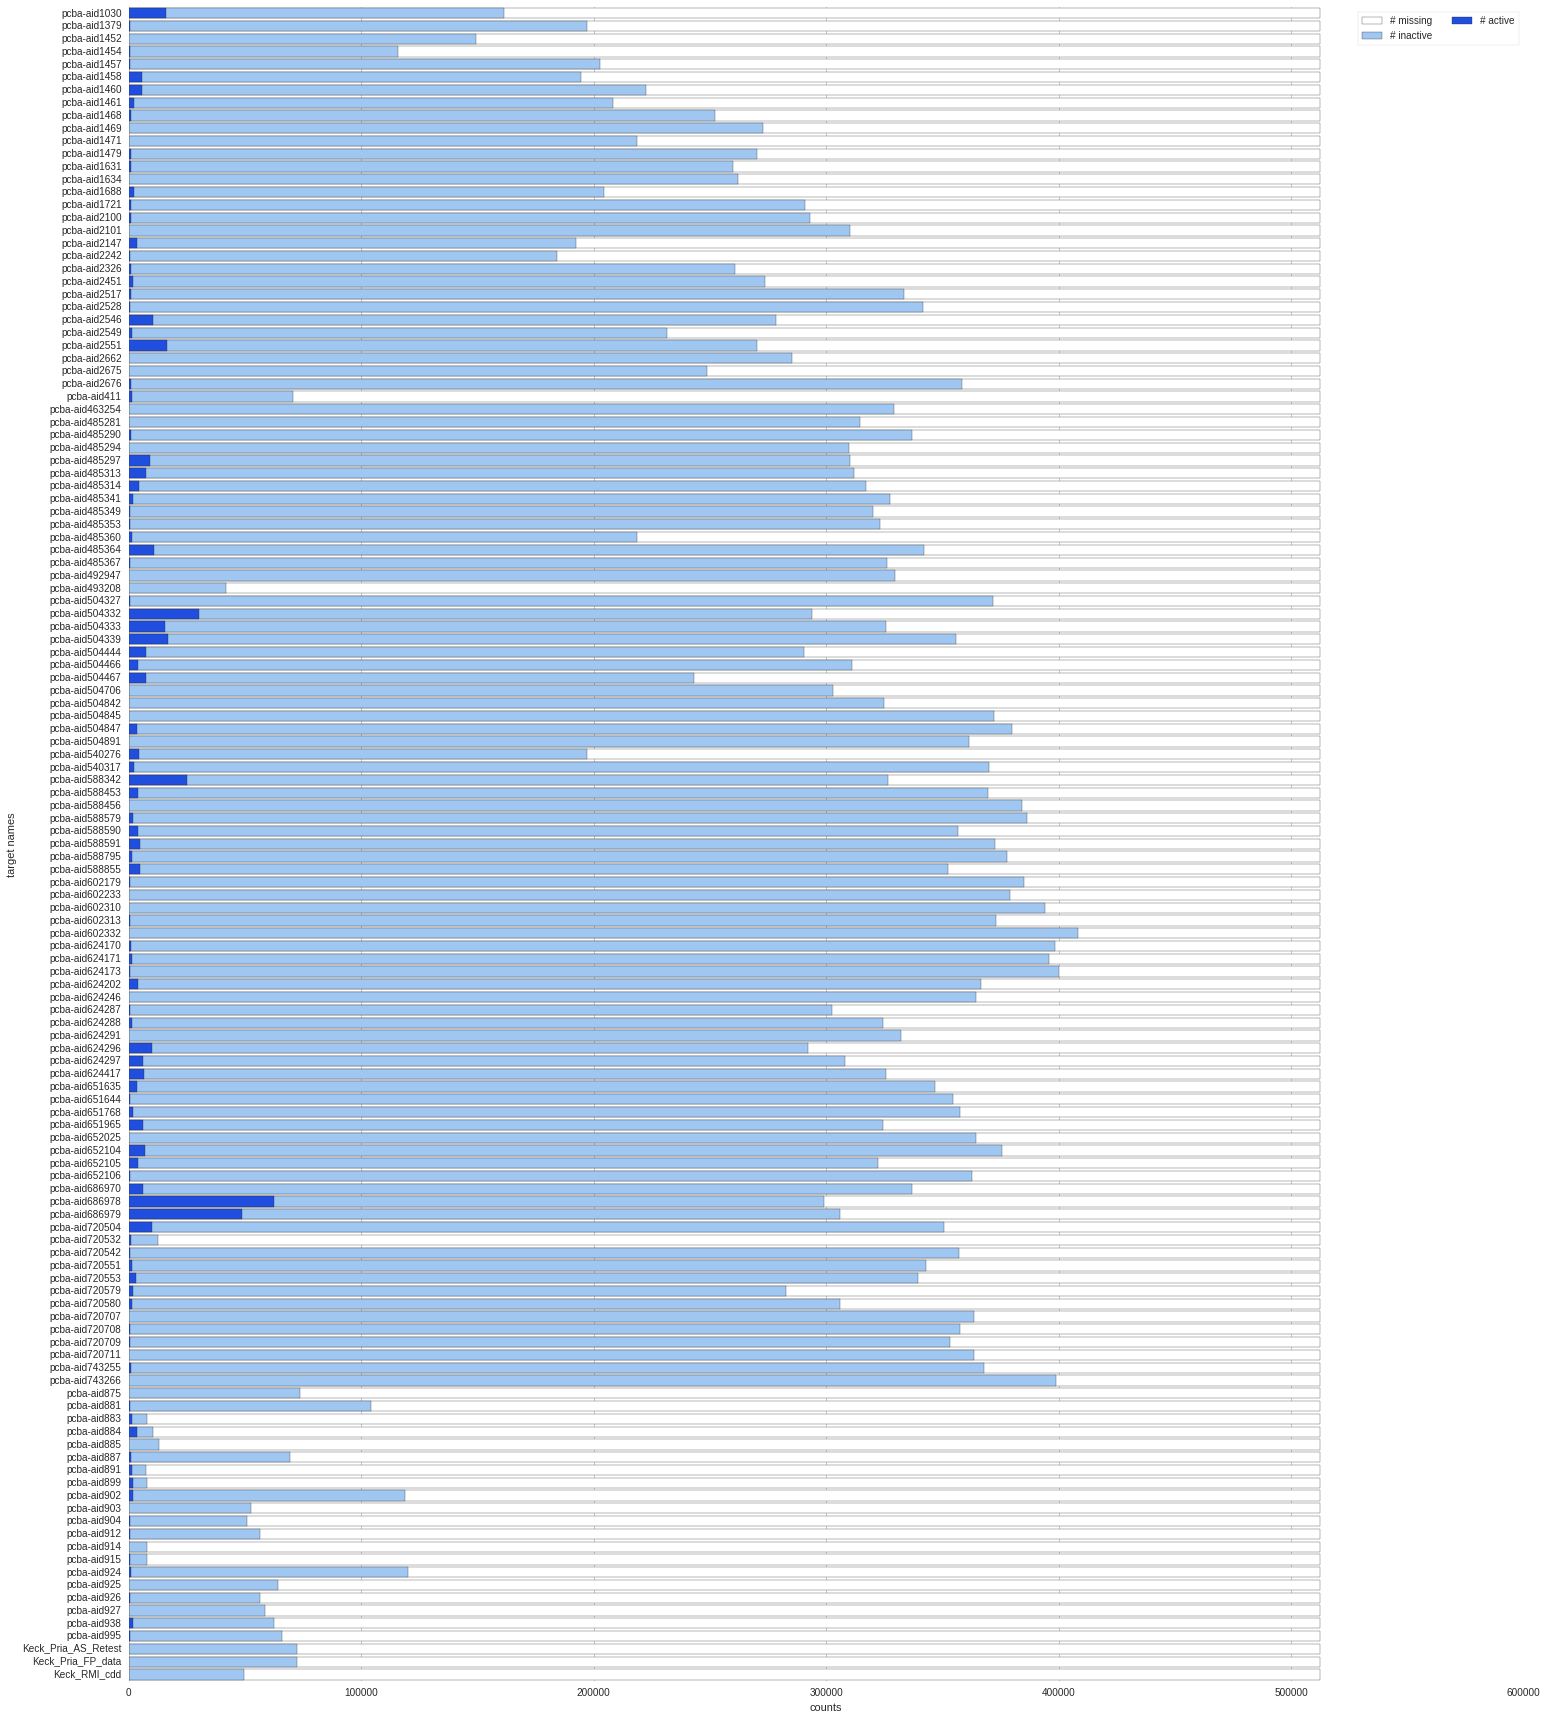

In [10]:
plot_summary(data_pd, plot_mode='show')

In [11]:
# plot_summary(data_pd[0:60], plot_mode='save', file_name='first')
# plot_summary(data_pd[60:], plot_mode='save', file_name='second')

In [12]:
def get_output_for_latex(data_pd):
    shape_ = data_pd.shape
    print shape_
    for row_index in range(shape_[0]):
        row = data_pd.iloc[row_index]
        print '{} & {} & {} & {} \\\\'.format(row['target names'].replace('_', '-'), 
                                              row['# 1'],
                                              row['# 0'] - row['# 1'],
                                              row['# -1'] - row['# 0'] - row['# 1'])
    return

get_output_for_latex(data_pd)

(131, 4)
pcba-aid1030 & 15932 & 145369 & 335063 \\
pcba-aid1379 & 561 & 196368 & 314806 \\
pcba-aid1452 & 178 & 149367 & 362573 \\
pcba-aid1454 & 513 & 115335 & 395935 \\
pcba-aid1457 & 720 & 202110 & 308746 \\
pcba-aid1458 & 5778 & 188852 & 311888 \\
pcba-aid1460 & 5650 & 217010 & 283986 \\
pcba-aid1461 & 2305 & 206016 & 301670 \\
pcba-aid1468 & 1038 & 251148 & 259072 \\
pcba-aid1469 & 170 & 272533 & 239423 \\
pcba-aid1471 & 293 & 218258 & 293452 \\
pcba-aid1479 & 793 & 269530 & 241180 \\
pcba-aid1631 & 892 & 259030 & 251482 \\
pcba-aid1634 & 154 & 261988 & 250000 \\
pcba-aid1688 & 2375 & 201910 & 305636 \\
pcba-aid1721 & 1087 & 289651 & 220471 \\
pcba-aid2100 & 1157 & 291855 & 218127 \\
pcba-aid2101 & 288 & 309907 & 201813 \\
pcba-aid2147 & 3473 & 188764 & 316586 \\
pcba-aid2242 & 715 & 183374 & 327492 \\
pcba-aid2326 & 1065 & 259688 & 250478 \\
pcba-aid2451 & 2005 & 271718 & 236568 \\
pcba-aid2517 & 1138 & 332123 & 177897 \\
pcba-aid2528 & 652 & 340938 & 170054 \\
pcba-aid2546 & 105